# Outlier 2020: WTF

Well, that was one hell of a year: the outlier incarnate (though not a *black swan*, since people have been warning about a global pandemic caused by a flu-like virus for years).

[Last year](http://outlier.illposed.com/articles/2019review), I compared 2019 to previous years and tried to look into the future a bit. Since things were so off the rails, it makes no sense do that again this year. Instead, I thought it would be a good opportunity to reflect on the past, especially with the official [Outlier Archive](https://archive-m2.outlier.nyc/) now online.

Still, we can start by taking a look at 2020 and how it was different from previous years.

**Contents**
* *This is Your Growth on 2020*
* Historical development of
  * Tops
  * Bottoms
  * Layers

In [1]:
import pandas as pd
import numpy as np
import scipy
import os
import os.path
from IPython.display import display
import utils
import plots
import altair as alt

df_all = utils.outlier_df('../../outlier-data.csv')

In [2]:
# Filter to Clothes
def type_to_kind(drop_type):
    if drop_type == "T-Shirt" or drop_type == "Shirt" or drop_type == "Tank Top":
        return "Top"
    if drop_type == "Pants" or drop_type == "Shorts":
        return "Bottom"
    return "Layer"


def row_to_subkind(row):
    drop_type = row['Type']
    if drop_type == "T-Shirt" or drop_type == "Shirt":
        pass
    elif drop_type == "Pants" or drop_type == "Shorts":
        pass
    elif drop_type == "Tank Top":
        drop_type = 'T-Shirt'
    else:
        drop_type = "Layer"
    exp = "Exp" if row['Exp'] else "Regular"
    return "{}/{}".format(drop_type, exp)


def object_type_to_kind(drop_type):
    if drop_type == "Backpack" or drop_type == "Bag" or drop_type == "Dopp Kit" \
       or drop_type == "Dufflebag" or drop_type == "Pouch":
        return "Bag"
    if drop_type == "Balaclava" or drop_type == "Bandana" or drop_type == "Scarf":
        return "Scarf/Bandana"
    if drop_type == "Cap" or drop_type == "Hat" or drop_type == "Hood":
        return "Headgear"
    if drop_type == "Bathrobe" or drop_type == "Robe" or drop_type == "Towel" \
       or drop_type == "Outerwear" or drop_type == "Keychain" or drop_type == "Socks":
        return "Misc"
    if drop_type == "Mask" or drop_type == "Belt":
        return drop_type     
    return "Misc"

# Define some reused frames
all_products_df = utils.drops_to_products(df_all, ['Year', 'Product'])
df_all['ColorCount'] = df_all['Colors'].str.split(',').dropna().apply(lambda d: len(d))

df_clothes = pd.DataFrame(df_all.loc[df_all['Category'] == 'Clothes', :])
df_clothes['Type'] = df_clothes['Type'].replace({'Sweatshirt':'Sweater'})
df_clothes["Kind"] = df_clothes['Type'].apply(type_to_kind)
df_clothes["Subkind"] = df_clothes.apply(row_to_subkind, axis=1)
clothes_products_df = utils.drops_to_products(df_clothes, ['Year', 'Product'])

df_objects = pd.DataFrame(df_all.loc[df_all['Category'] == 'Objects', :])
df_objects["Kind"] = df_objects['Type'].apply(object_type_to_kind)
objects_products_df = utils.drops_to_products(df_objects, ['Year', 'Product'])


kind_sort_order = ['Bottom', 'Top', 'Layer']
object_kind_sort_order = ['Bag', 'Mask', 'Scarf/Bandana', 'Headgear', 'Belt', 'Other']
year_sort = list(range(2020, 2012, -1))

# *This is Your Growth on 2020*

Given the restrictions and limitations of this year, it is not surprising that the number of drops and products declined significantly compared to last year. But maybe surprising is that the numbers did not fall off a cliff, rather they went back to the 2015 level, which, all things considering, does not seem that terrible.

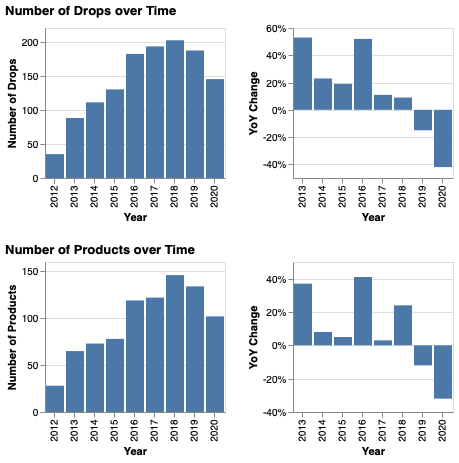

In [3]:
rel_per_year_df = pd.DataFrame(df_all.groupby('Year').count()['Product'])
prod_per_year_df = pd.DataFrame(all_products_df.groupby('Year').count()['Release']
)

(plots.plot_with_yoy(rel_per_year_df, 'Product', 'Drops').properties(title='Number of Drops over Time') 
& plots.plot_with_yoy(prod_per_year_df, 'Release', 'Products').properties(title='Number of Products over Time') )

## The Layer Cliff

A breakdown of the number of drops by categories brings some details into focus. The number of *clothing* drops went down, but the number of *object* drops was essentially unchanged against recent years due to a new category of object that saw incredible growth in demand: the *mask*.

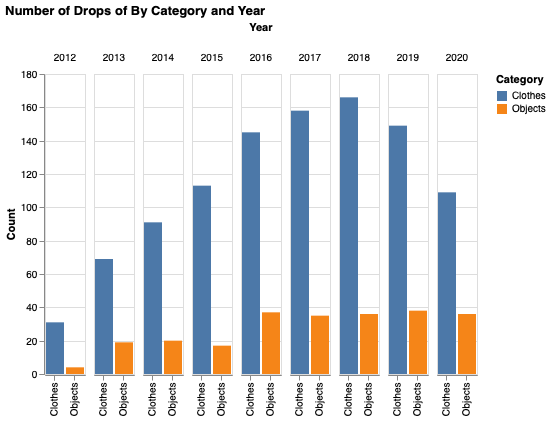

In [4]:
tdf = df_all.groupby(['Category', 'Year']).count()['Release'].reset_index()
tdf.columns = ['Category', 'Year', 'Count']
alt.Chart(tdf, width=40).mark_bar().encode(
    x=alt.X('Category:N', sort=kind_sort_order, title=None),
    y='Count:Q',
    color=alt.Color('Category:N', sort=kind_sort_order),
    column='Year:O',
    tooltip=['Count', ]
).configure_facet(spacing=7).properties(title='Number of Drops of By Category and Year')

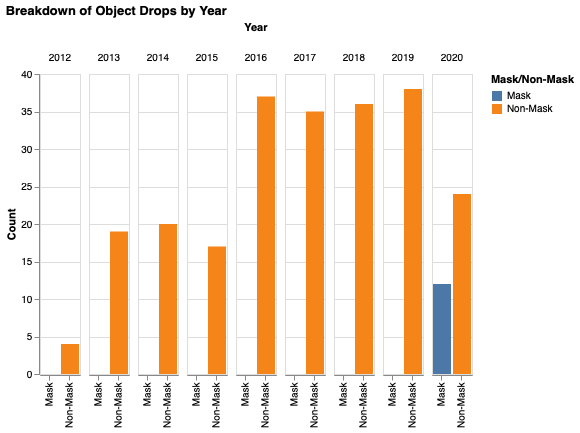

In [5]:
tdf = pd.DataFrame(df_objects, copy=True)
tdf['Mask/Non-Mask'] = tdf['Type'].apply(lambda x: 'Mask' if x == 'Mask' else 'Non-Mask')
tdf = tdf.groupby(['Mask/Non-Mask', 'Year']).count()['Release'].reset_index()
tdf = tdf.rename(columns={"Release": "Count"})
alt.Chart(tdf, width=40).mark_bar().encode(
    x=alt.X('Mask/Non-Mask:N', sort=kind_sort_order, title=None),
    y='Count:Q',
    color=alt.Color('Mask/Non-Mask:N', sort=kind_sort_order, title="Mask/Non-Mask"),
    column='Year:O',
    tooltip=['Count', ]
).configure_facet(spacing=7).properties(title='Breakdown of Object Drops by Year')

Looking at a finer-grained breakdown of clothing drops, we now find the cliff. Bottoms and tops were dropped at levels similar to 2019, but layer drops went down to levels not seen since seven years ago.

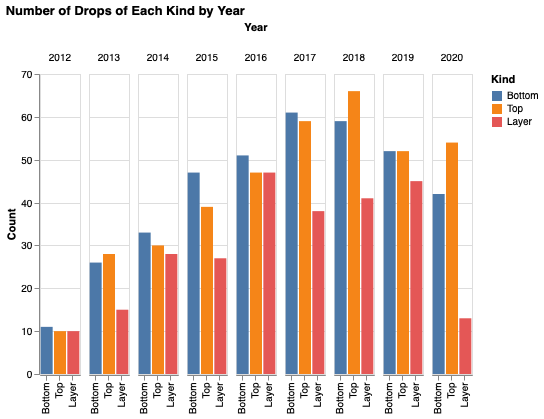

In [6]:
tdf = df_clothes.groupby(['Kind', 'Year']).count()['Release'].reset_index()
tdf.columns = ['Kind', 'Year', 'Count']
alt.Chart(tdf, width=40).mark_bar().encode(
    x=alt.X('Kind:N', sort=kind_sort_order, title=None),
    y='Count:Q',
    color=alt.Color('Kind:N', sort=kind_sort_order),
    column='Year:O',
    tooltip=['Count', ]
).configure_facet(spacing=7).properties(title='Number of Drops of Each Kind by Year')

## Seasonal Differences

A drop breakdown by quarter shows that 2020 started off big, and then Q2 hit. From Q2 on, there were fewer drops in each quarter than had been the case in the last several years.

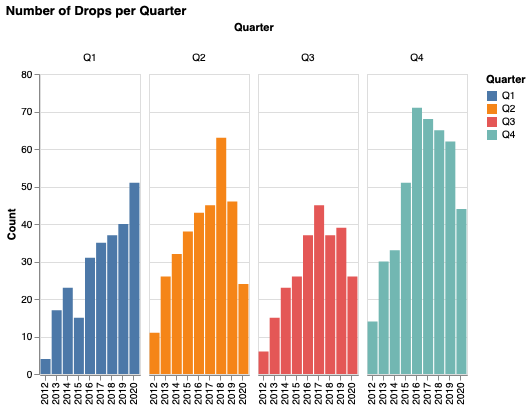

In [7]:
tdf = df_all.groupby(['Quarter', 'Year']).count()['Release'].reset_index()
tdf = tdf.rename(columns={"Release": "Count"})
alt.Chart(tdf, width=100).mark_bar().encode(
    x=alt.X('Year:N', sort=kind_sort_order, title=None),
    y='Count:Q',
    color=alt.Color('Quarter:N', sort=kind_sort_order),
    column='Quarter:O',
    tooltip=['Count']
).configure_facet(spacing=7).properties(title='Number of Drops per Quarter')

## Prices

What happened to prices in this abnormal year?

The next plots show the price of products, grouped by year. Each dot is the *maximum nominal price* of one product within a calendar year. The category of product is indicated by the color of the dot. The red lines show the *median inflation-adjusted price* for that year, adjusted using data from the [St. Louis Fed](https://fred.stlouisfed.org/series/PCEPILFE). Mousing over a dot will show the name, nominal, and inflation-adjusted prices for the product.

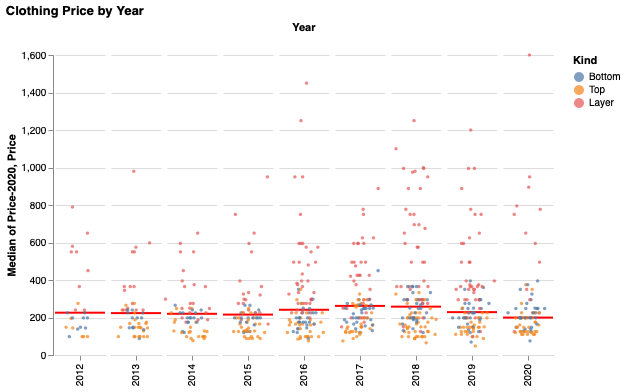

In [8]:
plots.price_plot(clothes_products_df, 'Kind', kind_sort_order).properties(title='Clothing Price by Year')

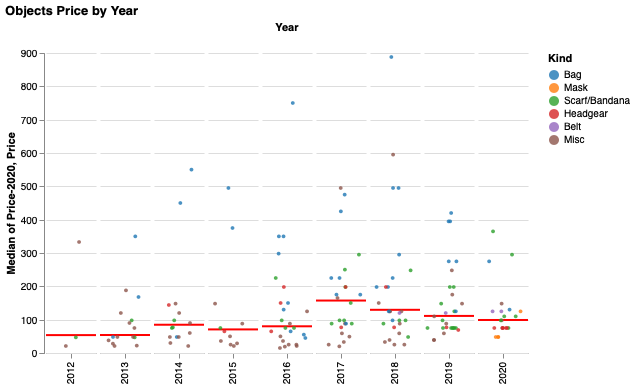

In [9]:
plots.price_plot(objects_products_df, 'Kind', object_kind_sort_order, 
                 'category10', 15, 0.8).properties(title='Objects Price by Year')

## Reups

What products got re-upped in 2020? The reups are probably more indicative of what was possible with the factories that were open and the fabric that was available, and it does not provide much insight into where Outlier is trying to go with their product line, but some might be curious nonetheless.

In [10]:
reups = []
index = []
for name, tdf in df_clothes.groupby("Product"):
    drops = tdf.groupby('Year').count()['Release']
    cat = tdf['Type'].iloc[0]
    kind = tdf['Kind'].iloc[0]

    # Products dropped in 2012 - 2013
    if drops.loc[2012:2013].sum() > 0 and tdf['MWU'].iloc[0] != 'Women':
        index.append((kind, cat, name))
        reups.append(drops)
        continue
    # Add layers by default
    if kind == 'Layer' and tdf['MWU'].iloc[0] != 'Women':
        index.append((kind, cat, name))
        reups.append(drops)
        continue        
    # Products dropped in at least 3 times since 2014
    if drops.loc[2014:2020].sum() > 2:
        index.append((kind, cat, name))
        reups.append(drops)
        continue
    # Products dropped at least 2 times in the last two years
    if drops.loc[2019:2020].sum() > 1:
        index.append((kind, cat, name))
        reups.append(drops)
        continue
reups_df = pd.DataFrame(reups, index=pd.MultiIndex.from_tuples(index, names=['Kind', 'Type', 'Product']))
reups_df = reups_df.sort_index()
# reups_df.head()

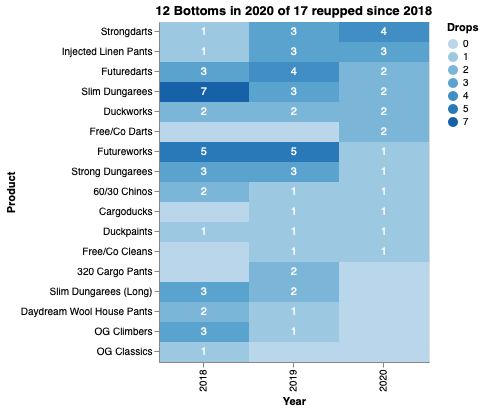

In [11]:
bottoms_df = reups_df.loc[('Bottom', 'Pants'), 2018:2020].dropna(axis=0, how='all')
title_bottoms = "{} Bottoms in 2020 of {} reupped since 2018".format(len(bottoms_df.loc[:,2020].dropna()), len(bottoms_df))
plots.drop_chart(bottoms_df.sort_values(list(range(2020, 2018, -1)), ascending=False)).properties(title=title_bottoms)

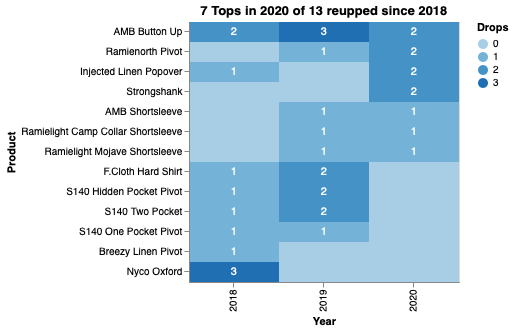

In [12]:
tops_df = reups_df.loc[('Top', 'Shirt'), 2018:2020].dropna(axis=0, how='all')
title_tops = "{} Tops in 2020 of {} reupped since 2018".format(len(tops_df.loc[:,2020].dropna()), len(tops_df))
plots.drop_chart(tops_df.sort_values(list(range(2020, 2018, -1)), ascending=False)).properties(title=title_tops)

# History and Evolution

So much for diving into 2020; we all know it was a bonkers year. Seeing the numbers does flesh out some detail, but there isn't much to be gained from dwelling on the year too long.

Let us direct our attention to the [Outlier Archive](https://archive-m2.outlier.nyc/). The move to the new website design in August [initially led to a loss of historical information](https://www.reddit.com/r/Outlier/comments/ic6r1s/new_website_design/g21fdxf?utm_source=share&utm_medium=web2x&context=3), but [after hearing from the community](https://www.reddit.com/r/Outlier/comments/icvhjx/website_next_steps/) about the importance of the history, they decided to resurrect the old site, with pages for products going back to 2009, and make it into an archive.

The value of that archive is clear. To me, as an outsider, it feels that each Outlier product is designed considering the interplay of fabric, cut, and style. That's certainly true for many other companies as well, but the context, including history, is perhaps more relevant for understanding something from Outlier because of the wide palette of fabrics they draw upon and the willingness to mess around with the patterns.

Now this resource is available, I thought it would be interesting to take a look at how different categories of products have evolved through the years. For jeans, trousers, button-up shirts, or t-shirts, there has been exporation of variations in the design space. Seeing that history casts light on the design process as well as external influences, like changing tastes.

What follows are a selection of products from the Outlier catalog. My data are less accurate for drops before 2013, so I have grouped them all together, but I have greater temporal resolution from 2014 on. Each product appears in the year it was first made available, together with some information about it: the year of the most recent drop, price (nominal), number of drops, fabric, and color information. The product name is a link that takes you to the [Illposed](https://outlier.illposed.com) page for it. From there, you can continue to the Outlier archive or the live page, if the product is still available.

The selection isn't comprehensive (many experiments are not represented), but it tries to capture significant products from each year to show how Outlier has changed over the years. For those of you that have been following the brand longer, this will be a trip down memory lane; if you are newer to the brand, have fun exploring the back catalog!

## Pants

In [13]:
tdf = utils.cat_year_df(reups_df, ('Bottom', 'Pants'))
plots.years_summary_display(df_all, tdf)

,Value
last drop,2020
price,198
number of drops,52
fabric,Workcloth
number of colors,35
colors,"Black, Blacktint Green, Blood Burgundy, Blood burgundy, Bluetint Gray, Burnt Umber, Charcoal, Charred Earth, Chesnut, Concrete, Copper, Copper Clay, Dark Indigo, Darkindigo, Gray Shadow, Indigo, Indigo Blue, Maroonshadow, Midindigo, Midshadow, Navy AF, Olive, Olive Black, Olive Gray, Pale Rose, Pale Steel, Phase Gray, Plum Slate, Raw Khaki, Resonant Navy, Sandshadow, Shademaroon, Steel, Steelshade, Zinc"
,Value
last drop,2020
price,$225 — 275
number of drops,26


,Value
last drop,2019
price,$198 — 225
number of drops,16
fabric,OG
number of colors,15
colors,"Black, Charcoal, Concrete, Deep Indigo, Desert Tan, Flat Black, Navy, Navy Slate, New Slate, Olive Drab, Quiet Shade, Shadow, Steel, Stone Blue, Young Olive"
,Value
last drop,2014
price,240
number of drops,3


,Value
last drop,2020
price,$125 — 148
number of drops,25
fabric,F. Cloth
number of colors,25
colors,"Blacktint Green, Blade Gray, Blue AF, Bluegray, Charcoal Gray, Dark Navy, Deep Gray, Desert Tan, Dusk Tan, Dust Olive, Flat Black, Gray, High Khaki, Khaki Drab, Midnight Gray, Olive Black, Phantom Gray, Phase Gray, Resonant Blue, Sagebrush, Sandstorm, Shademaroon, Tobacco, Washed Indigo, Zinc"
,Value
last drop,2019
price,198
number of drops,17


,Value
last drop,2017
price,$150 — 160
number of drops,4
fabric,Strongcloth
number of colors,5
colors,"Black Marine, Blue, Bluegray, Gray, Near Black"
,Value
last drop,2016
price,198
number of drops,3


,Value
last drop,2020
price,$165 — 198
number of drops,11
fabric,Injected Linen
number of colors,18
colors,"Black, Black 2, GD Acai, GD Dark Forest, GD Golden Brown, GD Gray, GD Gray Sky, GD Light Olive, GD Mauve Light, GD Midnight, GD Olive, GD Pale Olive, GD Phantom, GD Sandstorm, GD Slate Blue, GD Steel, GD Tannin, GS Sandstorm"
,Value
last drop,2017
price,$248 — 267
number of drops,3


,Value
last drop,2020
price,$175 — 198
number of drops,13
fabric,Strongtwill
number of colors,12
colors,"Black, Black Marine, Bluegray, Dark Olive, Darkindigo, Ganache, Gray, Gray Space, Navy, Off Black, Phantom Gray, Slate"
,Value
last drop,2020
price,$275 — 295
number of drops,7


,Value
last drop,2020
price,$148 — 198
number of drops,9
fabric,F. Cloth
number of colors,13
colors,"Blacktint Green, Bluegray, Charcoal Gray, Dark Navy, Deep Gray, Dust Olive, Flat Black, Khaki Drab, Olive Black, Phase Gray, Sandstorm, Tobacco, Zinc"
,Value
last drop,2020
price,$188 — 225
number of drops,8


,Value
last drop,2020
price,$198 — 225
number of drops,2
fabric,Free/Co Cleancloth Twill
number of colors,2
colors,"Black, Washed Black"
,Value
last drop,2020
price,350
number of drops,2


,Value
last drop,2020
price,248
number of drops,2
fabric,Free/Co Cleancloth Twill
number of colors,2
colors,"Black, Washed Black"


## Shorts

In [14]:
tdf = utils.cat_year_df(reups_df, ('Bottom', 'Shorts'))
plots.years_summary_display(df_all, tdf)

,Value
last drop,2013
price,148
number of drops,4
fabric,OG
number of colors,8
colors,"Black, Blue, Charcoal, Green, Navy, Purple, Red, Slate Gray"
,Value
last drop,2013
price,$138 — 145
number of drops,3


,Value
last drop,2013
price,88
number of drops,1
fabric,Linen
number of colors,3
colors,"Graytint Navy, Medium Gray, Pop Blue"


,Value
last drop,2020
price,$120 — 128
number of drops,19
fabric,F. Cloth
number of colors,36
colors,"Black, Blade Gray, Blue AF, Brown, Cayenne, Charcoal, Clear Blue, Cobalt, Copper Dawn, Dark Navy, Deep Gray, Deep Orange, Desert Tan, Double Sunshine, Dry Rose, Dust Olive, Flat Black, Forest, Ghost Blue, Gray, Haze, Khaki Drab, Marine, Olive Black, Phase Gray, Pink AF, Purp, Refraction, Resonant Blue, Sagebrush, Sandstorm, Seeing Red, Shademaroon, Titian Blue, Washed Indigo, Zinc"
,Value
last drop,2015
price,175
number of drops,3


,Value
last drop,2020
price,$125 — 138
number of drops,7
fabric,F. Cloth
number of colors,17
colors,"Blade Gray, Blue AF, Brown, Clear Blue, Copper Dawn, Dark Navy, Deep Gray, Desert Tan, Dry Rose, Dust Olive, Flat Black, Marine, Refraction, Resonant Blue, Sandstorm, Titian Blue, Zinc"
,Value
last drop,2020
price,$175 — 225
number of drops,6


,Value
last drop,2020
price,$175 — 198
number of drops,3
fabric,Ultra Ultra
number of colors,4
colors,"Black, Charcoal, Cloudshadow, Matte Navy"


,Value
last drop,2020
price,138
number of drops,2
fabric,F. Cloth
number of colors,7
colors,"Black, Blue AF, Dark Navy, Deep Gray, Flat Black, Khaki Drab, Sandstorm"


## T-Shirts

In [15]:
tdf = utils.cat_year_df(reups_df, ('Top', 'T-Shirt'))
plots.years_summary_display(df_all, tdf)

,Value
last drop,2020
price,$98 — 120
number of drops,44
fabric,Ultrafine Merino
number of colors,48
colors,"Black, Blood Burgundy, Blue Wing, Blueshadow, Botanical, Bravest Blue, Brutal Tan, Cayenne, Charcoal, Coal Orange, Copper, Copper Dawn, Dark Coffee, Dark Midnight, Dark Navy, Deep Gray, Deep Green, Desert Clay, Desert Tan, Dusk Blue, Dust Olive, Fiery, Fiery Red, Fired Clay, Forest Green, Ghost, Gray Light, High Blue, Jadakiss, Lagoon, Marine, Maritime Blue, Medium Gray, Near White, Olive Drab, Orange, Orange Sunshine, Phantom, Plummy, Plumsmoke, Pop Blue, Pop Green, Raw Ochre, Sage, Shadow Gray, Smoke, Tobacco, Yellow"
,Value
last drop,2015
price,148
number of drops,5


,Value
last drop,2017
price,$98 — 120
number of drops,4
fabric,Ultrafine Merino
number of colors,12
colors,"Black, Bravest Blue, Dark Navy, Deep Gray, Deep Green, Dusk Blue, Dust Olive, Gray Light, Near White, Pop Blue, Pop Green, Smoke"
,Value
last drop,2013
price,148
number of drops,1


,Value
last drop,2019
price,$75 — 88
number of drops,12
fabric,Runweight Merino
number of colors,17
colors,"Ash, Black, Black Navy, Cloudshadow, Coffee, Default Blue, Flat Black, Mean Blue, Midnight Navy, Mist, Navy Space, Near Black, Olive Drab, Phase Gray, Sea Blue, Stone Purple, Washed Indigo"


,Value
last drop,2017
price,$120 — 140
number of drops,3
fabric,Openweight Merino
number of colors,1
colors,Black
,Value
last drop,2016
price,88
number of drops,3


,Value
last drop,2020
price,$98 — 125
number of drops,17
fabric,Cottonweight Merino
number of colors,45
colors,"GD Black, GD Black Marine, GD Black Navy, GD Bluegray, GD Botanical, GD Brutal Tan, GD Burnt Orange, GD Charcoal, GD Cherry Magenta, GD Clear Sky, GD Cobalt, GD Dark Marine, GD Dark Olive, GD Decadent, GD Dry Rose, GD Dry Tan, GD Fuchsia, GD Fuchsia Decay, GD Gray Light, GD Green, GD Grenadine, GD High Blue, GD Kumquat, GD Lagoon, GD Light Olive, GD Lilac, GD Malibu Blue, GD Maritime Blue, GD Mauve Light, GD Mid Gray, GD Mineral Pink, GD Mint Green, GD Olive Drab, GD Orange, GD Orange Sun, GD Pale Blue, GD Phantom, GD Plumsmoke, GD Racing Green, GD Racinng Green, GD Reddit, GD Sage, GD Seeing Red, GD Yellow, Washed White"
,Value
last drop,2020
price,125
number of drops,10


,Value
last drop,2020
price,160
number of drops,9
fabric,Cottonweight Merino
number of colors,27
colors,"GD Berry, GD Black, GD Black Navy, GD Botanical, GD Cappuccino, GD Clear Sky, GD Default Blue, GD Grimace, GD Kumquat, GD Lagoon, GD Maritime Blue, GD Matcha, GD Mauve Light, GD Mint Green, GD Monk’s Robe, GD Olive Drab, GD Orange Sun, GD Pale Blue, GD Partly Cloudy, GD Phantom, GD Racing Green, GD Red, GD Reddit, GD Seeing Red, GD Shell Pink, GD Turmeric, GD Wave Blue"
,Value
last drop,2020
price,$125 — 148
number of drops,8


,Value
last drop,2019
price,98
number of drops,4
fabric,Dreamweight Merino
number of colors,3
colors,"Ash, Black, Desert Olive"
,Value
last drop,2019
price,150
number of drops,4


,Value
last drop,2019
price,250
number of drops,2
fabric,Warmform Merino
number of colors,2
colors,"Dark Gray, Matte Blue"
,Value
last drop,2020
price,$125 — 148
number of drops,2


,Value
last drop,2020
price,120
number of drops,3
fabric,Mackenzie Merino Jersey
number of colors,9
colors,"Black, Charcoal, Dark Navy, Deep Gray, Gray Light, High Blue, Plummy, Plumsmoke, Yellow"
,Value
last drop,2020
price,$75 — 110
number of drops,2


## Shirts

In [16]:
tdf = utils.cat_year_df(reups_df, ('Top', 'Shirt'))
plots.years_summary_display(df_all, tdf)

,Value
last drop,2012
price,275
number of drops,2
fabric,Supermarine
number of colors,1
colors,Gray
,Value
last drop,2012
price,98
number of drops,2


,Value
last drop,2016
price,175
number of drops,9
fabric,Merino/Co
number of colors,16
colors,"Blacktint, Bluetint Gray, Desert Tan, Dust Olive, Gray Sky, Iron Stone, Midrange Gray, Navy Sky, Night Blue, Red, Red Dust, Sky Blue, Strong Blue, Tan, Tataouine Red, Twilight Blue"
,Value
last drop,2016
price,$120 — 128
number of drops,5


,Value
last drop,2015
price,125
number of drops,3
fabric,Cotton
number of colors,3
colors,"Bluegray, Pale Blue, White"
,Value
last drop,2015
price,125
number of drops,3


,Value
last drop,2018
price,$98 — 120
number of drops,8
fabric,Nyco
number of colors,29
colors,"Blue and Gray, Burgundy Deep, Chambray Blue, Chambray Electric, Chambray Gray, Charged Gray, Cinnamon, Clear Midnight, Dark Navy, Electric Haze, Ember, Fiery Electric, Flame Chambray, Gray Oxford, Light Gray, Light Red, Navy, Navy Marine, New Light Gray, Ocean Blue, Olive Red, Oxford Blue, Oxford Electric, Pale Light, Phantom Navy, Polished Concrete, Shadow, Washed Oxford, White"
,Value
last drop,2018
price,$125 — 165
number of drops,6


,Value
last drop,2020
price,$198 — 255
number of drops,5
fabric,Injected Linen
number of colors,16
colors,"Black, GD Blackberry, GD Charcoal, GD Copper, GD Dry Rose, GD Gray Light, GD Gray Sky, GD Graystone, GD Light Blue, GD Metal Ocean, GD Midnight, GD Olive, GD Phantom Black, GD Sage, GD Sky Blue, GD Tannin"
,Value
last drop,2017
price,165
number of drops,4


,Value
last drop,2020
price,$198 — 265
number of drops,8
fabric,Albini Merino Broadcloth
number of colors,11
colors,"Black, Blue, Bluegray, Burnt Umber, Charcoal, Gray, Midblue, Navy, Olive Drab, Plumsmoke, Rich Navy"
,Value
last drop,2019
price,198
number of drops,4


,Value
last drop,2019
price,198
number of drops,3
fabric,S140 Twill
number of colors,4
colors,"Dark Navy, GD Black, Medium Gray, Serra"


,Value
last drop,2020
price,148
number of drops,3
fabric,Ramienorth
number of colors,9
colors,"GD Bluegray, GD Botanical, GD Dark Forest, GD Dust Olive, GD Gray Light, GD Mauve Light, GD Navy, GD Sky Blue, GD White"
,Value
last drop,2020
price,125
number of drops,2


,Value
last drop,2020
price,$248 — 350
number of drops,2
fabric,Strongtwill
number of colors,3
colors,"Black, Charcoal, Dark Olive"


# Blazers

In [17]:
tdf = utils.cat_year_df(reups_df, ('Layer', 'Blazer'))
plots.years_summary_display(df_all, tdf)

,Value
last drop,2014
price,550
number of drops,3
fabric,Ultralight
number of colors,2
colors,"Navy, New Slate"
,Value
last drop,2013
price,550
number of drops,2


,Value
last drop,2013
price,980
number of drops,1
fabric,“60/30”
number of colors,2
colors,"Metakhaki, Midnight Gray"


,Value
last drop,2016
price,$550 — 595
number of drops,8
fabric,“60/30”
number of colors,12
colors,"Black, Bluegray, Charcoal, Dark Brown, Dark Marine, Deep Navy, Desert Tan, Marine, Midnight Gray, Midnight Navy, Olive, Steel Gray"


,Value
last drop,2016
price,575
number of drops,1
fabric,“60/30”
number of colors,3
colors,"Black Navy, Earth Taupe, Warm Gray"


,Value
last drop,2020
price,650
number of drops,2
fabric,Injected Linen
number of colors,1
colors,Black
,Value
last drop,2018
price,695
number of drops,1


# Hoodies

In [18]:
tdf = utils.cat_year_df(reups_df, ('Layer', 'Hoodie'))
plots.years_summary_display(df_all, tdf)

,Value
last drop,2012
price,450
number of drops,1
fabric,Liberated Wool
number of colors,1
colors,Charcoal Gray


,Value
last drop,2017
price,275
number of drops,9
fabric,Doublefine Merino
number of colors,21
colors,"Allspice, Black, Black Navy, Black/Blue, Black/Darkspace, Blacktint Green, Blue Wing, Brutal Tan, Dark Gray, Darkspace, Deep Blue, Deep Gray, Deep Tan, Evergreen, Gray Sky, Medium Gray, Navy, Olive Steel, Red Earth, Shademaroon, Walnut"


,Value
last drop,2015
price,275
number of drops,1
fabric,Merino
number of colors,2
colors,"Black, Marsdust"


,Value
last drop,2017
price,$225 — 248
number of drops,4
fabric,Co/Weight Cotton
number of colors,4
colors,"Black, Gray, Olive, Tan"
,Value
last drop,2017
price,$275 — 298
number of drops,3


,Value
last drop,2017
price,495
number of drops,1
fabric,Hard/Co Merino Terryback
number of colors,1
colors,Black
,Value
last drop,2017
price,595
number of drops,1


,Value
last drop,2019
price,395
number of drops,4
fabric,Hard/Co Merino Terryback
number of colors,5
colors,"Black, DarkNavy, Darkmarine, Gray, Shardegray"
,Value
last drop,2018
price,350
number of drops,1


,Value
last drop,2019
price,350
number of drops,1
fabric,Warmform Merino
number of colors,3
colors,"Black, Dark Gray, Matte Blue"
,Value
last drop,2019
price,395
number of drops,1


# Outerwear

In [19]:
tdf = utils.cat_year_df(reups_df, ('Layer', 'Outerwear'))
plots.years_summary_display(df_all, tdf)

,Value
last drop,2015
price,650
number of drops,3
fabric,Liberated Wool
number of colors,3
colors,"Ash Gray, Charcoal, Navy"
,Value
last drop,2014
price,365
number of drops,2


,Value
last drop,2013
price,365
number of drops,1
fabric,Woolback
number of colors,1
colors,Slate Gray
,Value
last drop,2013
price,575
number of drops,1


,Value
last drop,2016
price,$365 — 395
number of drops,5
fabric,Ultralight
number of colors,13
colors,"Black, Cloudshadow, Deep Gray, Deep Navy, Moss Olive, Navy Space, New Slate, Offshore Blue, Phase Gray, Shademaroon, Skytint Gray, Smoke Indigo, Whitetint Gray"
,Value
last drop,2016
price,595
number of drops,4


,Value
last drop,2016
price,750
number of drops,2
fabric,Liberated Wool
number of colors,2
colors,"Charcoal Gray, Navy"
,Value
last drop,2015
price,950
number of drops,1


,Value
last drop,2017
price,$575 — 625
number of drops,2
fabric,Strongtwill/Strongwool Fleece
number of colors,4
colors,"Black, Black Marine, Bluegray, Gray"
,Value
last drop,2017
price,$425 — 432
number of drops,2


,Value
last drop,2018
price,$675 — 777
number of drops,2
fabric,Strongwool Fleece
number of colors,2
colors,"Dark Gray, Light Gray"
,Value
last drop,2018
price,750
number of drops,2


,Value
last drop,2019
price,365
number of drops,2
fabric,F. Cloth
number of colors,4
colors,"Bluegray, Flat Black, Marine, Sandstorm"
,Value
last drop,2018
price,295
number of drops,1


,Value
last drop,2020
price,$495 — 750
number of drops,2
fabric,Supermarine
number of colors,1
colors,Black
,Value
last drop,2019
price,595
number of drops,1


,Value
last drop,2020
price,595
number of drops,1
fabric,Injected Linen
number of colors,2
colors,"Black, Charcoal"
,Value
last drop,2020
price,495
number of drops,1


# Ponchos

In [20]:
tdf = utils.cat_year_df(reups_df, ('Layer', 'Poncho'))
plots.years_summary_display(df_all, tdf)

,Value
last drop,2013
price,365
number of drops,1
fabric,Ultralight
number of colors,3
colors,"Blue, Gray, Red"


,Value
last drop,2020
price,$125 — 150
number of drops,4
fabric,Linen
number of colors,16
colors,"Artificial Grape, Black Rock, Blue Wing, Botanical Green, Flamingo Dreams, Gray Rock, Lemon, Mid Indigo, Natural, New Red, Orange, Orange Glow, Red, Seaglass, Sky Blue, Summer Blue"
,Value
last drop,2018
price,$750 — 888
number of drops,2


,Value
last drop,2018
price,150
number of drops,2
fabric,Extrafleece
number of colors,1
colors,Black
,Value
last drop,2018
price,975
number of drops,1


,Value
last drop,2020
price,$248 — 295
number of drops,2
fabric,Strongwool Fleece
number of colors,7
colors,"Blue, Blue AF, Cobalt, Double Sunshine, Fuchsia, Green, Pink AF"
,Value
last drop,2019
price,365
number of drops,2


# Sweaters

In [21]:
tdf = utils.cat_year_df(reups_df, ('Layer', 'Sweater'))
plots.years_summary_display(df_all, tdf)

,Value
last drop,2016
price,240
number of drops,7
fabric,Doublefine Merino
number of colors,11
colors,"Black, Black Navy, Blacktint Green, Brutal Tan, Deep Blue, Deep Gray, Evergreen, Gray Sky, Medium Gray, Navy, Walnut"


,Value
last drop,2017
price,$198 — 225
number of drops,5
fabric,Doublefine Merino
number of colors,16
colors,"Allspice, Black, Black Navy, Blacktint Green, Blue Wing, Brutal Tan, Dark Gray, Deep Gray, Deep Tan, Gray Sky, Marsdust, Navy, Olive Steel, Red Earth, Shademaroon, Walnut"
,Value
last drop,2015
price,188
number of drops,3


,Value
last drop,2016
price,333
number of drops,2
fabric,Alphacore
number of colors,3
colors,"Black, Deep Gray, Medium Gray"
,Value
last drop,2015
price,225
number of drops,1


,Value
last drop,2016
price,325
number of drops,2
fabric,Strongwool Fleece
number of colors,2
colors,"Dark Gray, Light Gray"
,Value
last drop,2017
price,$175 — 225
number of drops,2


,Value
last drop,2017
price,198
number of drops,2
fabric,Co/Weight Cotton
number of colors,4
colors,"Black, Gray, Olive, Tan"
,Value
last drop,2017
price,495
number of drops,1


,Value
last drop,2019
price,295
number of drops,3
fabric,Hard/Co Merino Terryback
number of colors,4
colors,"Black, Darkmarine, Gray, White"
,Value
last drop,2019
price,365
number of drops,2


,Value
last drop,2019
price,375
number of drops,2
fabric,Densewaffle Merino
number of colors,4
colors,"Black, Dark Gray, Matte Blue, Shadowy"
,Value
last drop,2019
price,$333 — 365
number of drops,2


# Vests

In [22]:
tdf = utils.cat_year_df(reups_df, ('Layer', 'Vest'))
plots.years_summary_display(df_all, tdf)

,Value
last drop,2012
price,240
number of drops,1
fabric,Soft Core
number of colors,0
colors,


,Value
last drop,2013
price,345
number of drops,1
fabric,Soft Core
number of colors,1
colors,Gray
,Value
last drop,2013
price,240
number of drops,1


,Value
last drop,2014
price,275
number of drops,1
fabric,Merino
number of colors,2
colors,"Earth, Gray"
,Value
last drop,2014
price,175
number of drops,1


,Value
last drop,2015
price,325
number of drops,1
fabric,Ultralight
number of colors,2
colors,"Black, Skytint Gray"
,Value
last drop,2015
price,295
number of drops,1


,Value
last drop,2017
price,$295 — 333
number of drops,2
fabric,Alphacharge
number of colors,3
colors,"Black, Blackmarine, Shock Blue"


,Value
last drop,2017
price,595
number of drops,1
fabric,"Merino, S120 Twill"
number of colors,1
colors,Black/Navy
,Value
last drop,2017
price,375
number of drops,1


,Value
last drop,2018
price,275
number of drops,1
fabric,F. Cloth
number of colors,3
colors,"Deep Orange, Flat Black, Marine"


,Value
last drop,2020
price,350
number of drops,2
fabric,Gostwyck Alphacore
number of colors,2
colors,"Black, Bluegray"
,Value
last drop,2019
price,625
number of drops,1


# 2021

That's all I've got for this year. Let's see what develops in 2021.